In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [72]:
cust=pd.read_csv("Customer Acqusition.csv")
spend=pd.read_csv("spend.csv")
repay=pd.read_csv("Repayment.csv")


In [73]:
cust.shape,spend.shape,repay.shape

((100, 8), (1500, 5), (1500, 4))

In [74]:
print(repay.info(),spend.info(),cust.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------  

- There is no null value in each of the tables. 

### 1. Data manipulation

a) In case age is less than 18, replace it with mean of age values. 

In [75]:
cust.Age=cust.Age.apply(lambda x: cust.Age.mean() if x<18 else x )
cust.loc[cust.Age<18].Age

Series([], Name: Age, dtype: float64)

In [76]:
spend_df=pd.merge(cust,spend,left_on="Customer",right_on="Customer",how="inner")
repay_df=pd.merge(cust,repay,left_on="Customer",right_on="Customer",how="inner")

spend_df.shape,repay_df.shape

((1500, 12), (1500, 11))

In [77]:
# Lets check if each of the 100 customers have made transactions and made repayment

all(spend_df.Customer.unique()==repay_df.Customer.unique()),spend_df.Customer.unique().size,repay_df.Customer.unique().size

(True, 100, 100)

b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [78]:
def fun(x):
    if x[1]>x[0]:
        x[1]=0.5* x[0]
    else:
        pass 
    return x   

spend_df[["Limit","Amount"]]=spend_df[["Limit","Amount"]].apply(fun,axis=1)

c) Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [79]:
def fun1(x):
    if x[1]>x[0]:
        x[1]=x[0]
    else:
        pass
    return x    
repay_df[["Limit","Amount"]]=repay_df[["Limit","Amount"]].apply(fun1,axis=1)

### 2 Creating summaries
a) How many distinct customers exist?

In [80]:
cust.Customer.unique().size
# 100 unique customers

100

b) How many distinct categories exist?

In [81]:
print(spend.Type.unique())  # there are 15 distinct categories of type of products purchased by customers .
cust.Product.unique()         # only three categories

['JEWELLERY' 'PETRO' 'CLOTHES' 'FOOD' 'CAMERA' 'SANDALS' 'CAR' 'BIKE'
 'AUTO' 'SHOPPING' 'AIR TICKET' 'BUS TICKET' 'TRAIN TICKET' 'RENTAL'
 'MOVIE TICKET']


array(['Gold', 'Silver', 'Platimum'], dtype=object)

c) What is the average monthly spend by customers?


In [82]:
spend_df.Month=pd.to_datetime(spend_df.Month,format="%d-%b-%y")
spend_df.dtypes

No                   int64
Customer            object
Age                float64
City                object
Product             object
Limit              float64
Company             object
Segment             object
Sl No:               int64
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

<Axes: ylabel='Month'>

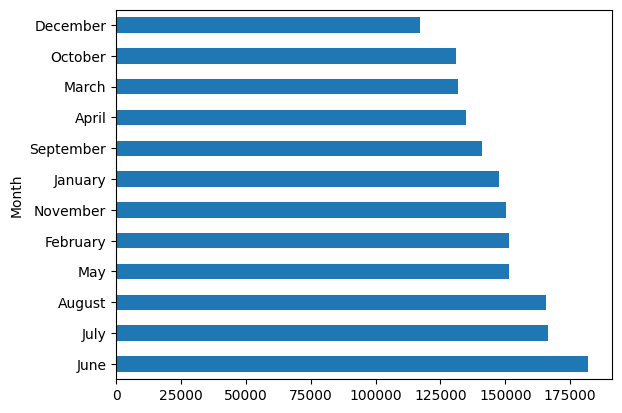

In [83]:
# Average monthly spent
spend_df.groupby(spend_df.Month.dt.month_name()).Amount.mean().sort_values(ascending=False).plot(kind='barh')

d) What is the average monthly repayment by customers?

In [84]:
repay_df.Month=pd.to_datetime(repay_df.Month,format="%d-%b-%y")
repay_df.dtypes

No                   int64
Customer            object
Age                float64
City                object
Product             object
Limit              float64
Company             object
Segment             object
SL No:               int64
Month       datetime64[ns]
Amount             float64
dtype: object

<Axes: ylabel='Month'>

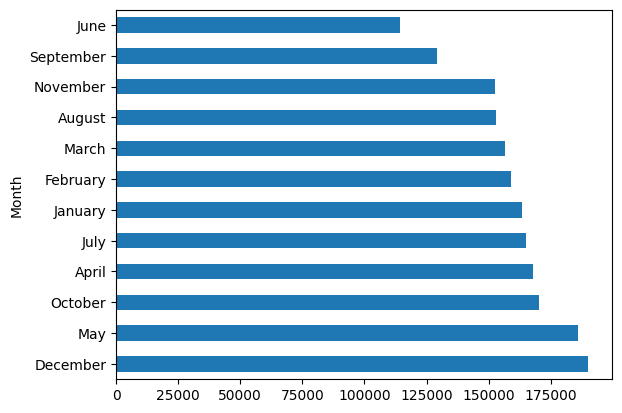

In [85]:
# Average monthly repayment
repay_df.groupby(repay_df.Month.dt.month_name()).Amount.mean().sort_values(ascending=False).plot(kind='barh')

e) monthly profit??

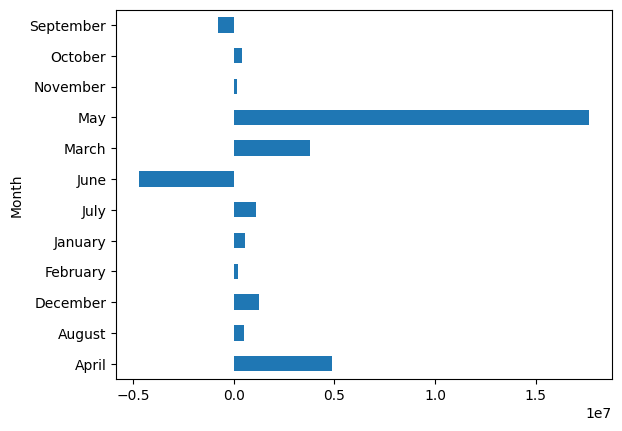

In [86]:
monthly_repayment=repay_df.groupby(repay_df.Month.dt.month_name()).Amount.sum()
monthly_spend=spend_df.groupby(spend_df.Month.dt.month_name()).Amount.sum()

monthly_profit=monthly_repayment-monthly_spend
monthly_profit.plot(kind="barh")
plt.show()

f)What are the top 5 product types?

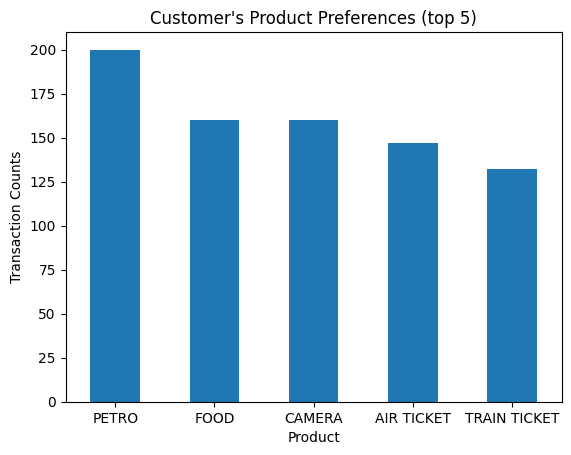

In [87]:
spend_df.Type.value_counts().nlargest(5).plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Customer's Product Preferences (top 5)")
plt.ylabel("Transaction Counts")
plt.xlabel("Product")
plt.show()

g) Which city is having maximum spend?


In [88]:
spend_df.groupby("City")["Amount"].sum().nlargest(1)   # Cochin's customeres spend the most with their credit card.

City
COCHIN    45963513.5
Name: Amount, dtype: float64

h) Which age group is spending more money?


In [89]:
spend_df.Age.max(),spend_df.Age.min()

(79.0, 19.0)

In [90]:
pd.cut(spend_df.Age,bins=10,labels=["19-25","26-31","32-37","38-43","44-49","50-55","56-61","62-67","68-73","74-79"])

0       74-79
1       74-79
2       74-79
3       74-79
4       74-79
        ...  
1495    50-55
1496    56-61
1497    50-55
1498    32-37
1499    32-37
Name: Age, Length: 1500, dtype: category
Categories (10, object): ['19-25' < '26-31' < '32-37' < '38-43' ... '56-61' < '62-67' < '68-73' < '74-79']

In [91]:
spend_df["Age_grp"]=pd.cut(spend_df.Age,bins=10,labels=["19-25","26-31","32-37","38-43","44-49","50-55","56-61","62-67","68-73","74-79"])


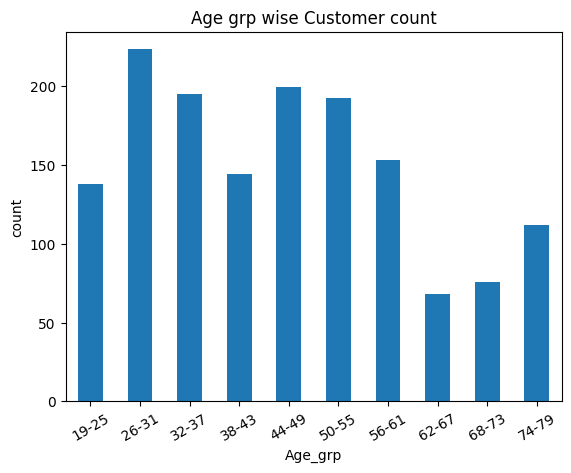

In [92]:
spend_df.groupby("Age_grp").size().plot(kind="bar")
plt.title("Age grp wise Customer count")
plt.xticks(rotation=30)
plt.ylabel("count")
plt.show()

- So the customers in 26-31 age group are the most active customers

In [93]:
spend_df.groupby("Age_grp").Amount.sum().nlargest(1)

Age_grp
44-49    39907148.99
Name: Amount, dtype: float64

- The age grp of 44-49 are spending the most. 

i) Who are the top 10 customers in terms of repayment?

In [94]:
repay_df.groupby("Customer")["Amount"].sum().nlargest(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Amount, dtype: float64

- Customer A61 is at top in terms of making repayment

### 3. Calculate the city wise spend on each product on yearly basis.

In [95]:
wide_df2=spend_df.groupby(["City",spend_df.Month.dt.year,"Product"])["Amount"].sum().reset_index().sort_values(by="Amount",ascending=False)
wide_df2.columns=['City', 'Year', 'Product', 'Amount']

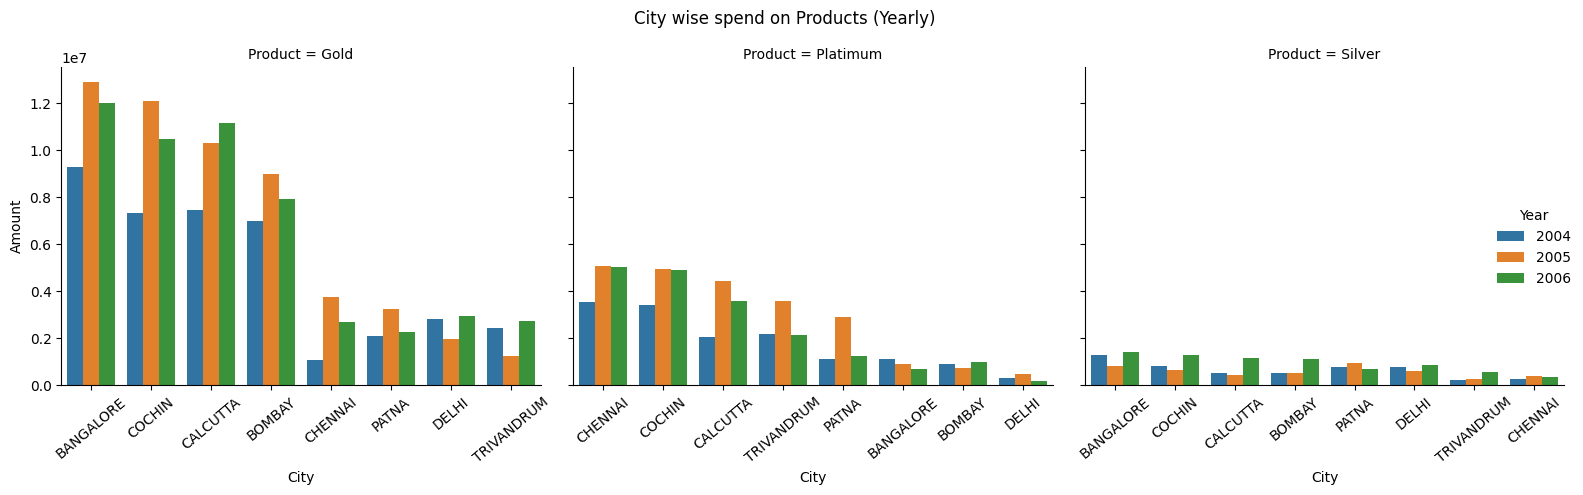

In [96]:
ax=sns.catplot(wide_df2,x="City",y="Amount",hue="Year",errorbar=None,col="Product",kind="bar",height=5,sharex=False)
ax.tick_params(axis="x",rotation=40)
plt.suptitle("City wise spend on Products (Yearly) ")
plt.tight_layout()
plt.show()

### 4. creating graphs for: 
a) Monthly comparison of total spends, city wise

In [97]:
grped_mnth_sp=spend_df.groupby([spend_df.Month.dt.strftime("%b"),"City"]).Amount.sum().reset_index().sort_values(by="Amount",ascending=False)

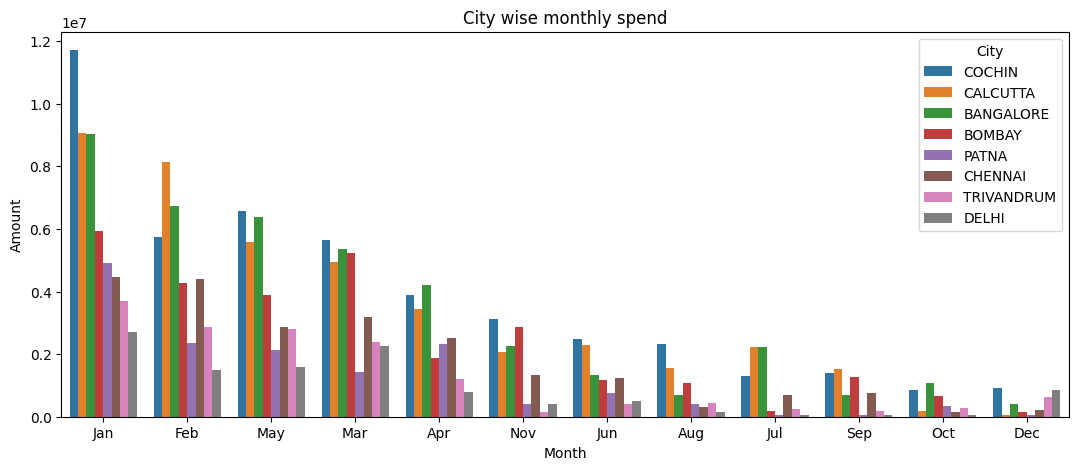

In [98]:
plt.figure(figsize=(13,5))
plt.title("City wise monthly spend")
sns.barplot(grped_mnth_sp,x="Month",y="Amount",hue="City")
plt.show()

b) Yearly spend o Air Tickets

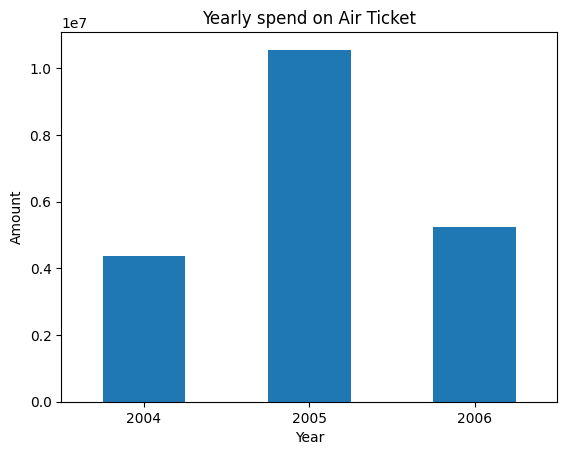

In [99]:
spend_df[spend_df["Type"]=="AIR TICKET"].groupby(spend_df.Month.dt.strftime("%Y"))["Amount"].sum().plot(kind="bar")
plt.title("Yearly spend on Air Ticket")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

c) Comparison of monthly spend for each product

In [100]:
spend_df["Year"]=spend_df.Month.dt.year
spend_df

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_grp,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,74-79,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,74-79,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,74-79,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,74-79,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,74-79,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,50-55,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,56-61,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,50-55,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,32-37,2004


In [101]:
monthly_sp_by_prod=spend_df.groupby(["Year",spend_df.Month.dt.month,"Product"]).Amount.sum().reset_index()

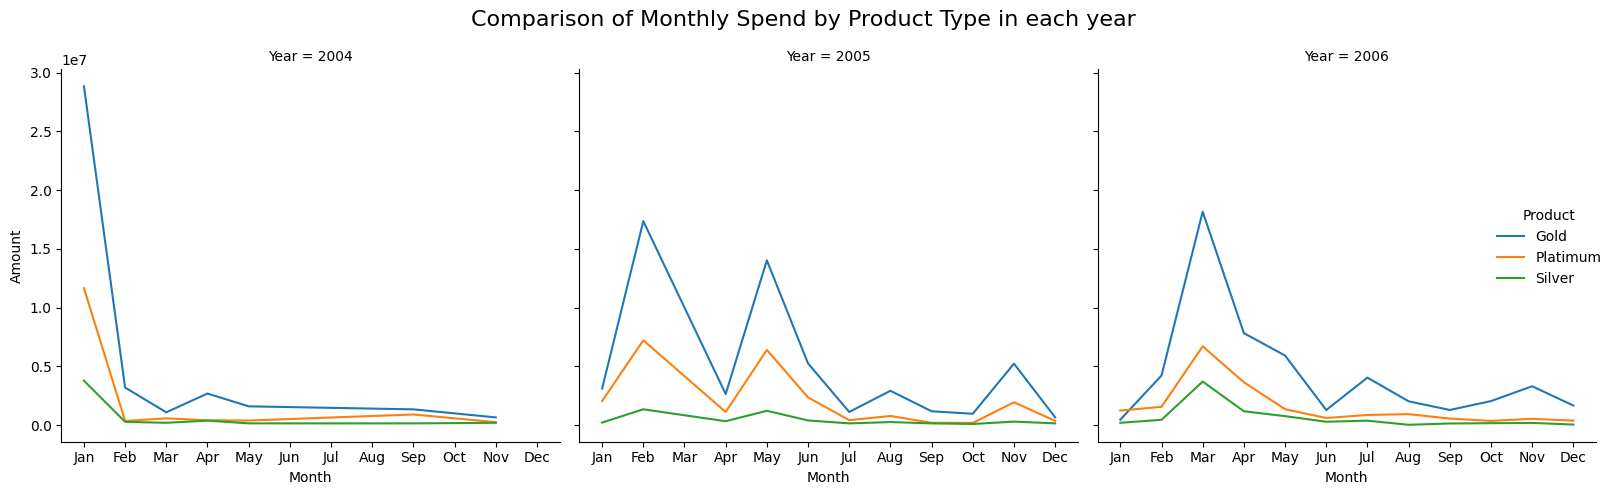

In [102]:
g=sns.relplot(monthly_sp_by_prod,x="Month",y="Amount",kind="line",hue="Product",col="Year")
for ax in g.axes.flat:
    xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    xticks_label = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks_label)
    # ax.tick_params(axis='x', rotation=40)
plt.suptitle("Comparison of Monthly Spend by Product Type in each year", fontsize=16)
plt.tight_layout()
plt.show()


- Each year, in starting months the spend amount is highest among gold and platinum product category thereby contributing the most in spend amount in each year. 
- The spending behavior in each product category and year appears to decrease consistently after April. 

Additionally we can look at the monthly trend (on year=2005) of amount spend by the customers on each "Type" of product they used the credit card. 

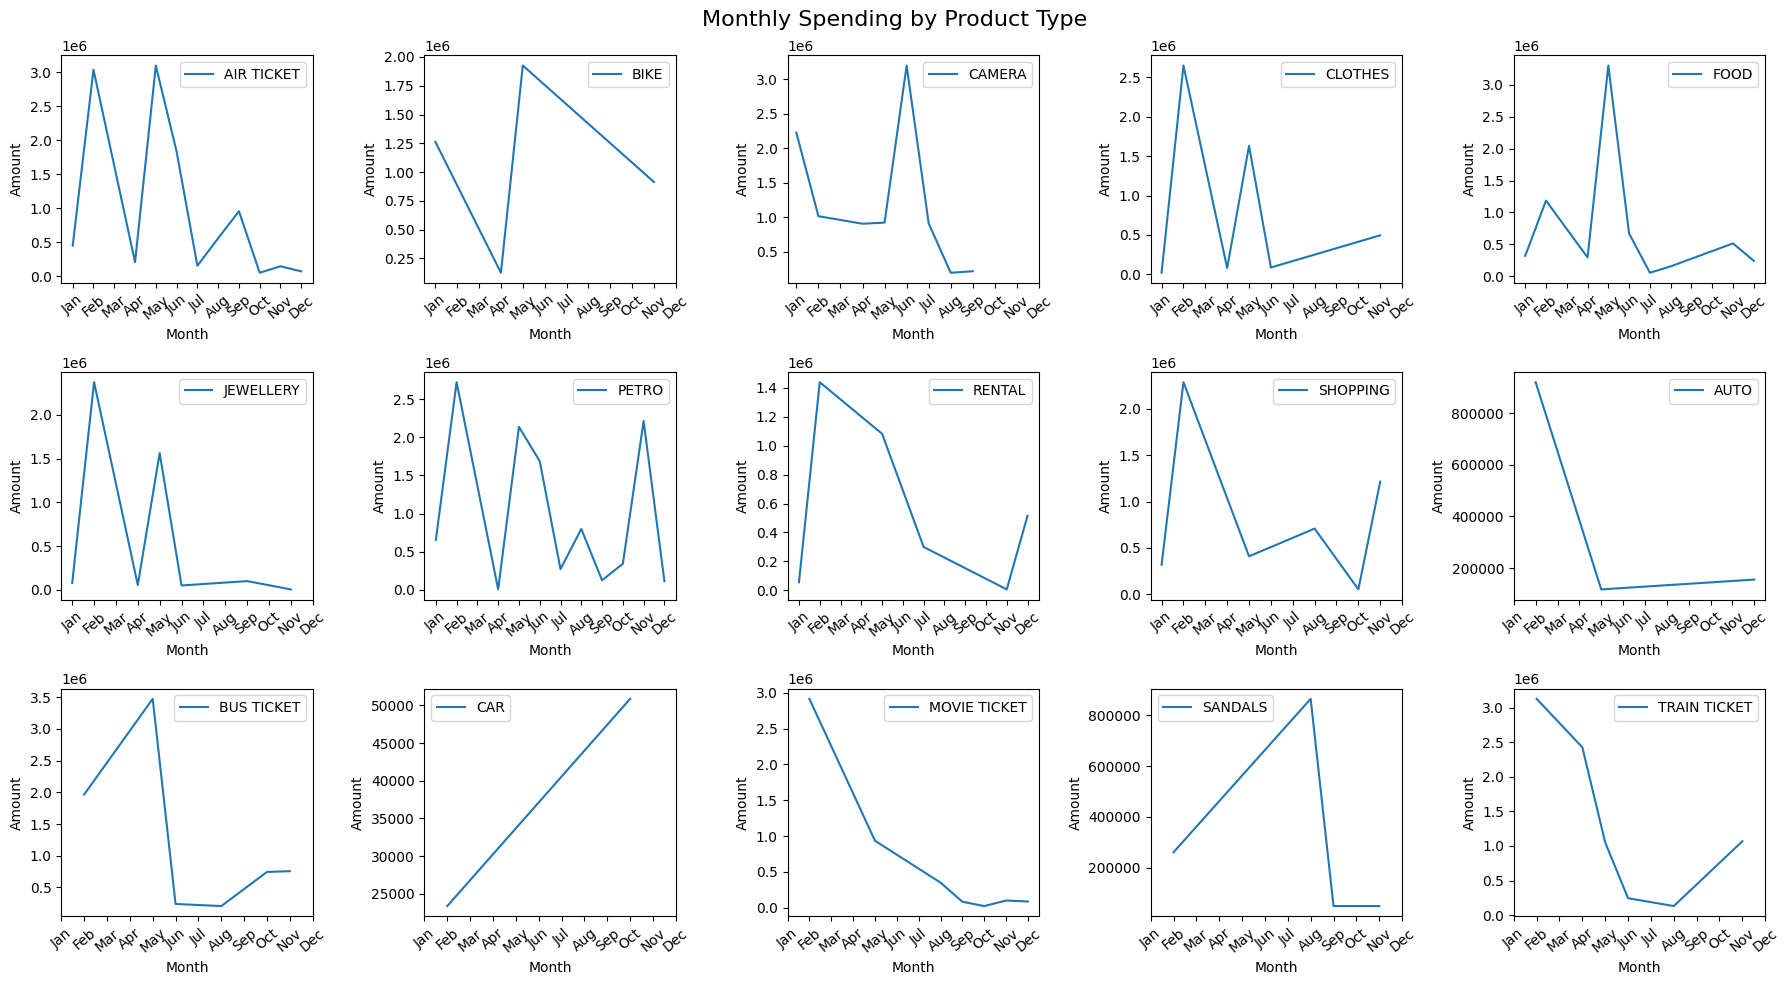

In [106]:
monthly_sp_by_prod=spend_df[spend_df.Month.dt.year==2005].groupby([spend_df.Month.dt.month,"Type"]).Amount.sum().reset_index()

fig,axes=plt.subplots(nrows=3,ncols=5,sharex=False,figsize=(18,10))
axes=axes.flatten()
for i,prod in enumerate(monthly_sp_by_prod.Type.unique()):
    sns.lineplot(monthly_sp_by_prod[monthly_sp_by_prod.Type==prod],x="Month",y="Amount",label=prod,ax=axes[i])
    axes[i].legend()
    xticks=[1,2,3,4,5,6,7,8,9,10,11,12]
    xticks_label=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    axes[i].set_xticks(xticks)
    axes[i].set_xticklabels(xticks_label)
    axes[i].tick_params(axis='x', rotation=40)

plt.suptitle("Monthly Spending by Product Type", fontsize=16)
plt.tight_layout()    
plt.show()



### 5. Make a user defined function on:
 
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [ ]:
def top_10_customers(df):
    print("Enter the Product (Gold,platinum,silver): ")    
    prod=input()
    print("Product Category:",prod)
    
    print("Enter year (2004,2005) to get the yearly top 10 customers or month (jan,feb...) to get monthly (of both years combined) top 10 customers :")
    period=input()
    print("Year/Month:",period)
    
    if len(period)==3:
        filter_df=df.loc[(df.Month.dt.strftime("%b")==period.capitalize()) & (df.Product==prod.capitalize())]
        top_10=filter_df.groupby("Customer").Amount.sum().nlargest(10).index    
    else: 
        filter_df=df.loc[(df.Month.dt.strftime("%Y")==period) & (df.Product==prod.capitalize())]
        top_10=filter_df.groupby("Customer").Amount.sum().nlargest(10).index
    
    return list(top_10) 
    
print("\n","These are the top 10 customers in terms of repayment :","\n",top_10_customers(repay_df))
      

Enter the Product (Gold,platinum,silver): 
Product Category: gold
Enter year (2004,2005) to get the yearly top 10 customers or month (jan,feb...) to get monthly (of both years combined) top 10 customers :
Year/Month: dec

 These are the top 10 customers in terms of repayment : 
 ['A17', 'A28', 'A26', 'A45', 'A14', 'A64', 'A27', 'A44']
